# Data Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\dheer\OneDrive\Pictures\Desktop\ames-housing-prediction\data\AmesHousing.csv')

print("Dataset Shape:",df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (2930, 82)

First 5 rows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
print(df.columns.tolist())

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [9]:
df['SalePrice'].head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [13]:
print("Average Price:",df['SalePrice'].mean())

Average Price: 180796.0600682594


In [14]:
print("Cheapest house Price:",df['SalePrice'].min())
print("Most expensive house:",df['SalePrice'].max())

Cheapest house Price: 12789
Most expensive house: 755000


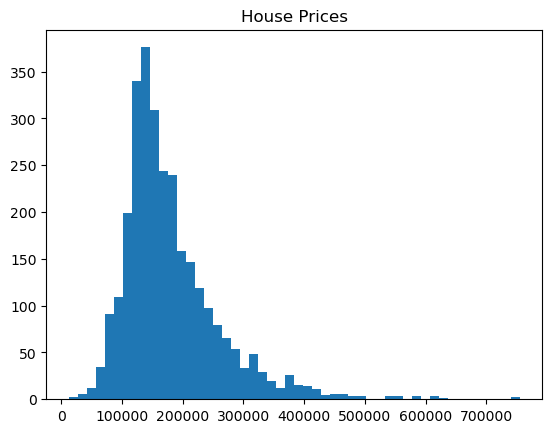

In [104]:
# Price Distribution:

plt.hist(df['SalePrice'], bins=50)
plt.title('House Prices')
plt.show()

The Price distribution shows that most houses sell between 100K - 250K USD, with few of the luxury properties above $500K. This Histogram is right-skewed and is very commonly seen in real estate markets.

# Missing Value Count

In [16]:
missing_count = df.isnull().sum().sum()
print("Total Missing Values in the dataset are:",missing_count)

Total Missing Values in the dataset are: 15749


In [18]:
print("Overall Quality (1-10 scale):")
print(df['Overall Qual'].head())

Overall Quality (1-10 scale):
0    6
1    5
2    6
3    7
4    5
Name: Overall Qual, dtype: int64


In [22]:
print("House Living Area (in Sq.Ft.) :")
print(df['Gr Liv Area'].tail())

House Living Area (in Sq.Ft.) :
2925    1003
2926     902
2927     970
2928    1389
2929    2000
Name: Gr Liv Area, dtype: int64


In [21]:
print("Year Built:")
print(df['Year Built'].head())

Year Built:
0    1960
1    1961
2    1958
3    1968
4    1997
Name: Year Built, dtype: int64


# Data Cleaning

In [49]:
missing_by_column =df.isnull().sum()
print("Columns with missing values:")
print(missing_by_column[missing_by_column > 0].sort_values(ascending = False))

Columns with missing values:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Garage Finish      159
Garage Cond        159
Garage Qual        159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
dtype: int64


Here, We have the most number of missing values for Pool QC. Instead of removing the feature, I wanted to retain it under the reason: the premium property list.

In [50]:
premium_features = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']

for feature in premium_features:
    new_col_name = f'Has_{feature.replace(" ", "_")}'
    df[new_col_name] = df[feature].notnull().astype(int)
    print(f"{new_col_name}: {df[new_col_name].sum()} houses have this feature.")

Has_Pool_QC: 13 houses have this feature.
Has_Misc_Feature: 106 houses have this feature.
Has_Alley: 198 houses have this feature.
Has_Fence: 572 houses have this feature.
Has_Fireplace_Qu: 1508 houses have this feature.


In [51]:
# HANDLING THE REMAINING MISSING VALUE FEATURES
# LOT FRONTAGE FEATURE

lot_frontage_median = df['Lot Frontage'].median()
df['Lot Frontage'].fillna(lot_frontage_median, inplace=True)
print(f"Filled the Lot Frontage missing values with median: {lot_frontage_median}")
print("Remaining missing values in Lot Frontage:",df['Lot Frontage'].isnull().sum())

Filled the Lot Frontage missing values with median: 68.0
Remaining missing values in Lot Frontage: 0


C:\Users\dheer\AppData\Local\Temp\ipykernel_3448\1824264094.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(lot_frontage_median, inplace=True)


In [52]:
# ALL GARAGE FEATURES

garage_columns = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

for col in garage_columns:
    print(f"\n{col}:")
    print(f" Missing values: {df[col].isnull().sum()}")
    print(f" Sample values: {df[col].dropna().head(3).tolist()}")


Garage Type:
 Missing values: 157
 Sample values: ['Attchd', 'Attchd', 'Attchd']

Garage Yr Blt:
 Missing values: 159
 Sample values: [1960.0, 1961.0, 1958.0]

Garage Finish:
 Missing values: 159
 Sample values: ['Fin', 'Unf', 'Unf']

Garage Cars:
 Missing values: 0
 Sample values: [2.0, 1.0, 1.0]

Garage Area:
 Missing values: 0
 Sample values: [528.0, 730.0, 312.0]

Garage Qual:
 Missing values: 159
 Sample values: ['TA', 'TA', 'TA']

Garage Cond:
 Missing values: 159
 Sample values: ['TA', 'TA', 'TA']


In [53]:
# Investigating the Garage related columns to find patterns within their findings

missing_garage_area = df[df['Garage Area'].isnull()]
missing_garage_cars = df[df['Garage Cars'].isnull()]

print("Houses with missing Garage Area:")
print(missing_garage_area[['Garage Type', 'Garage Cars', 'Garage Area', 'Garage Qual']].head())

print("\nHouses with missing Garage Cars:")
print(missing_garage_cars[['Garage Type', 'Garage Cars', 'Garage Area', 'Garage Qual']].head())

Houses with missing Garage Area:
Empty DataFrame
Columns: [Garage Type, Garage Cars, Garage Area, Garage Qual]
Index: []

Houses with missing Garage Cars:
Empty DataFrame
Columns: [Garage Type, Garage Cars, Garage Area, Garage Qual]
Index: []


Looks like both columns 'Garage Area' and 'Garage Cars' have the missing values from same record of the dataset. From the finding, We can confirm that the Garage Type is 'Detached', but coming to Garage Cars, Garage Area, Garage Quality, These were missing. That means, The missing columns for this row are unknowns. Let's delve even more deeper into this specific house or observarion which we are currently working on right now.

In [54]:
# Let's see more details about this specific house

problem_house = df[df.index == 2236]
print("Full garage info for house 2236:")
garage_cols = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']
print(problem_house[garage_cols])

Full garage info for house 2236:
     Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
2236      Detchd            NaN           NaN          2.0        400.0   

     Garage Qual Garage Cond  
2236         NaN         NaN  


In [55]:
# Let's fill the observation with typical detachable garage values:

detached_garages = df[df['Garage Type'] == 'Detchd']
print("Typical detached garage stats:")
print(f"Typical cars: {detached_garages['Garage Cars'].median()}")
print(f"Typical area: {detached_garages['Garage Area'].median()}")

Typical detached garage stats:
Typical cars: 2.0
Typical area: 400.0


In [56]:
df.loc[2236, 'Garage Cars'] = 2.0
df.loc[2236, 'Garage Area'] = 400.0
print("Fixed house 2236!")
print("Remaining missing values:")
print(f"Garage Cars: {df['Garage Cars'].isnull().sum()}")
print(f"Garage Area: {df['Garage Area'].isnull().sum()}")

Fixed house 2236!
Remaining missing values:
Garage Cars: 0
Garage Area: 0


In [57]:
#  Create Has-Garage feature using the clean Garage Area data

df['Has_Garage'] = (df['Garage Area']>0).astype(int)
print(f"Houses with garage: {df['Has_Garage'].sum()}")
print(f"Houses without garage: {(df['Has_Garage'] == 0).sum()}")
print("Garage feature created successfully")

Houses with garage: 2773
Houses without garage: 157
Garage feature created successfully


In [58]:
# Handle remaining missing values

# Handling the BASEMENT feature by filling the missing values with 0
df['Has_Basement'] = (df['Total Bsmt SF'].fillna(0) > 0).astype(int)

# Fill MISSING ELECTRICAL with the most common values
most_common_electrical = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(most_common_electrical)

# Fill MISSING MASONRY AREA with 0 (no masonry)
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

print("Quick cleanup results:")
print(f"Houses with basement: {df['Has_Basement'].sum()}")
print(f"Most common ELectrical: {most_common_electrical}")
print(f"Electrical missing values: {df['Electrical'].isnull().sum()}")
print(f"Masonry ara missing values: {df['Mas Vnr Area'].isnull().sum()}")


Quick cleanup results:
Houses with basement: 2850
Most common ELectrical: SBrkr
Electrical missing values: 0
Masonry ara missing values: 0


In [60]:
# Fixing the Negative House Age (-1) problem

# Fix negative age - Set minimum age to 0 (newly built houses)
df['House_Age'] = df['House_Age'].clip(lower=0)

print("After fixing negative ages:")
print(f"House age range: {df['House_Age'].min()} to {df['House_Age'].max()} years")
print(f"Average house age: {df['House_Age'].mean():.1f} years")
print(f"Houses with negative age now: {len(df[df['House_Age'] < 0])}")

After fixing negative ages:
House age range: 0 to 136 years
Average house age: 36.4 years
Houses with negative age now: 0


In [61]:
# Secondary Data Cleanliness check

print(f"Total missing values: {df.isnull().sum().sum()}")
df.isnull().sum()[df.isnull().sum() > 0]

Total missing values: 15233


Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

From the above, We can conclude that for few columns like pool QC, Misc Feature, Alley, Fence and Fireplace Qu, We can categorize the missing values as "No Feature" of the above version s of the special amenities. But, We need to focus upon the medium missing valued features like Mas Vnr Type, Garage Features and Low missing values (Which has 1-2 missing values each) and clean them up again.

In [66]:
# Handle most important missing values quickly
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
df['Garage Finish'] = df['Garage Finish'].fillna('None')
df['Garage Qual'] = df['Garage Qual'].fillna('None')
df['Garage Cond'] = df['Garage Cond'].fillna('None')

# Fill small basement missing values with median
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].median())
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].median())
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)

print("Quick Cleanup Completed!")
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")
df.isnull().sum()[df.isnull().sum() > 0]

Quick Cleanup Completed!
Remaining Missing Values: 12818


Alley             2732
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

# Feature Engineering 

In [67]:
# Creating Value adding features

# Create total bathrooms feature
df['Total_Bathrooms'] = df['Full Bath'] + df['Half Bath'] * 0.5 + df['Bsmt Full Bath'] + df['Bsmt Half Bath'] * 0.5

# Create Total Square feet feature
df['Total_SF'] = df['Gr Liv Area'] + df['Total Bsmt SF']

print("New features created are:")
print(f"Total Bathrooms range: {df['Total_Bathrooms'].min()} to {df['Total_Bathrooms'].max()}")
print(f"Total SF range: {df['Total_SF'].min()} to {df['Total_SF'].max()}")

New features created are:
Total Bathrooms range: 1.0 to 7.0
Total SF range: 334.0 to 11752.0


In [68]:
# Create price per square foot benchmark (For later uses)

# overall quality * total SF interaction
df['Quality_SF_Interaction'] = df['Overall Qual'] * df['Total_SF']

# Age group feature (New vs Old homes)
df['Is_New_Home'] = (df['House_Age'] <= 5).astype(int)

print("Additional Features:")
print(f"Quality-SF Interaction range: {df['Quality_SF_Interaction'].min()} to {df['Quality_SF_Interaction'].max()}")
print(f"New homes (<= 5 Years): {df['Is_New_Home'].sum()} houses")
print(f"Older homes (> 5 years): {(df['Is_New_Home'] == 0).sum()} houses")

Additional Features:
Quality-SF Interaction range: 334.0 to 117520.0
New homes (<= 5 Years): 627 houses
Older homes (> 5 years): 2303 houses


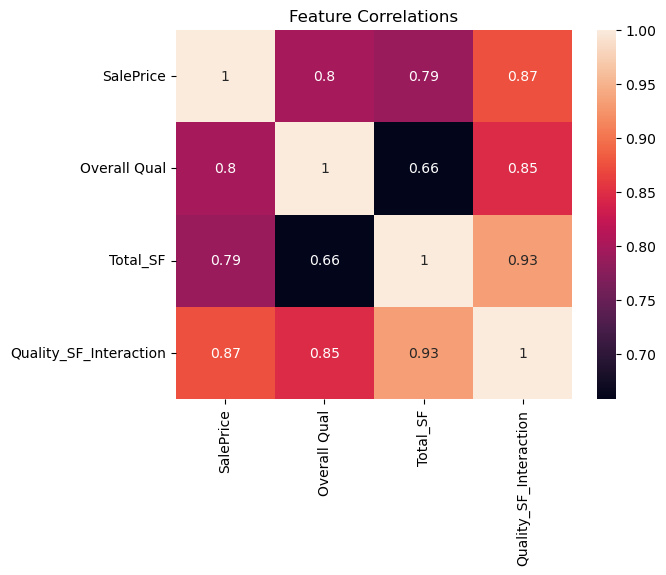

In [108]:
# Correlation Heatmap for different features:

import seaborn as sns
features = ['SalePrice','Overall Qual','Total_SF','Quality_SF_Interaction']
sns.heatmap(df[features].corr(), annot=True)
plt.title('Feature Correlations')
plt.show()

"Quality_SF_Interaction" shows the strongest correlation (0.87) with SalePrice (y in this project), validating the feature engineering approach that was made above. Traditional features like Overall Quality have lower individual correlations.

# Model Building

In [71]:
print("Dataset ready for modeling")
print(f"Shape: {df.shape}")
print("Key features created: Total_Bathrooms, Total_SF, Quality_SF_Interaction, Is_New_Home")

Dataset ready for modeling
Shape: (2930, 95)
Key features created: Total_Bathrooms, Total_SF, Quality_SF_Interaction, Is_New_Home


In [74]:
# Importing modeling libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

print("Expanded model library imported!")
print("Models to test:")
print("- Ridge Regression")
print("- Random Forest")
print("- Gradient Boosting")
print("- Linear Regression")
print("- Lasso Regression")
print("- Decision Tree")
print("- Support Vector Regression")

Expanded model library imported!
Models to test:
- Ridge Regression
- Random Forest
- Gradient Boosting
- Linear Regression
- Lasso Regression
- Decision Tree
- Support Vector Regression


In [79]:
# Data Preparation:

feature_columns = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built', 'Total_Bathrooms', 'Total_SF', 'House_Age', 'Quality_SF_Interaction', 'Has_Garage', 'Has_Basement', 'Has_Pool_QC', 'Is_New_Home']
x = df[feature_columns]
y = df['SalePrice']

print("Feature columns selected!")
print(f"Number of features: {len(feature_columns)}")


Feature columns selected!
Number of features: 13


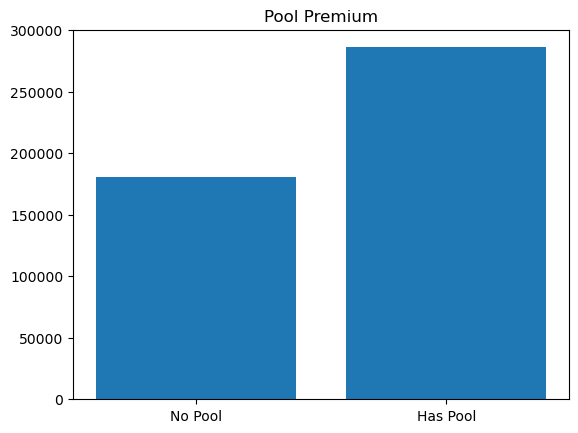

In [110]:
pool_prices = df.groupby('Has_Pool_QC')['SalePrice'].mean()
plt.bar(['No Pool','Has Pool'],pool_prices)
plt.title('Pool Premium')
plt.show()

Houses with pools demands a premium of around $125,000 over houses without pools, showing the value of the premium features in pricing of a property.

In [82]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("Data split completed:")
print(f"Training set: {x_train.shape}")
print(f"Test set: {x_test.shape}")
print(f"Target variable (SalePrice) range: ${y.min():,} to ${y.max():,}")

Data split completed:
Training set: (2344, 13)
Test set: (586, 13)
Target variable (SalePrice) range: $12,789 to $755,000


In [86]:
# Models initialization:

models = {
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regressor': LinearRegression()
}

print("Models initialized:")
for name in models.keys():
    print(f"- {name}")

Models initialized:
- Ridge
- Random Forest
- Gradient Boosting
- Linear Regressor


In [94]:
print("Checking training data:")
print(f"x_train missing values: {x_train.isnull().sum().sum()}")
print(f"y_train missing values: {y_train.isnull().sum()}")
print(f"x_train data types:")
print(x_train.dtypes)

Checking training data:
x_train missing values: 1
y_train missing values: 0
x_train data types:
Overall Qual                int64
Gr Liv Area                 int64
Garage Area               float64
Total Bsmt SF             float64
Year Built                  int64
Total_Bathrooms           float64
Total_SF                  float64
House_Age                   int64
Quality_SF_Interaction    float64
Has_Garage                  int32
Has_Basement                int32
Has_Pool_QC                 int32
Is_New_Home                 int32
dtype: object


There is one missing value present in the training dataset, which makes the model fail. So, I'm fixing it now.

In [97]:
print("Before fixing:")
print(f"x_train missing: {x_train.isnull().sum().sum()}")
print(f"x_test missing: {x_test.isnull().sum().sum()}")

# Fill missing values with median for numerical columns
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

print("\nAfter fixing:")
print(f"x_train missing values: {x_train.isnull().sum().sum()}")
print(f"x_test missing values: {x_test.isnull().sum().sum()}")
print("Both datasets are now clean!")

Before fixing:
x_train missing: 0
x_test missing: 1

After fixing:
x_train missing values: 0
x_test missing values: 0
Both datasets are now clean!


In [98]:
# Test each model one by one
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R² = {r2:.4f}")

Ridge: R² = 0.8293
Random Forest: R² = 0.8741
Gradient Boosting: R² = 0.8800
Linear Regressor: R² = 0.8294


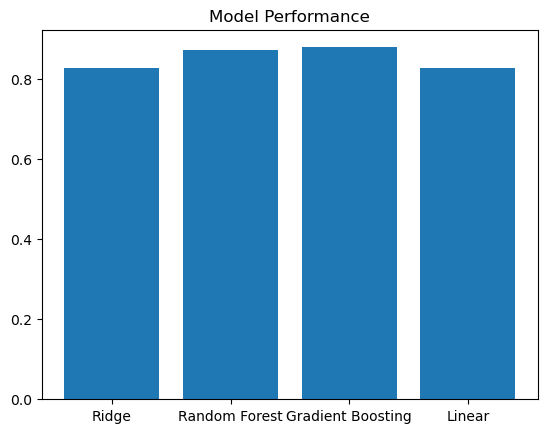

In [111]:
# Model Scores:

models = ['Ridge','Random Forest','Gradient Boosting','Linear']
scores = [0.8293,0.8741,0.8800,0.8294]
plt.bar(models, scores)
plt.title('Model Performance')
plt.show()

Gradient Boosting achieved the highest R-Square score(0.8800), which outperforms traditional linear models listed above by around 5%. Ensemble methods prove superior for this coomplex housing datasets

In [102]:
# Get the best model and it's performance
best_model = GradientBoostingRegressor(random_state = 42)
best_model.fit(x_train, y_train)
best_pred = best_model.predict(x_test)
best_r2 = r2_score(y_test, best_pred)

print("Best Model Results:")
print(f"Model: Gradient Boosting")
print(f"R2 Score: {best_r2:.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, best_pred):.0f}")

Best Model Results:
Model: Gradient Boosting
R2 Score: 0.8800
Mean Squared Error: 961848417


In [103]:
# Top 10 Important features
pd.Series(best_model.feature_importances_,index = x_train.columns).nlargest(10)

Quality_SF_Interaction    0.858482
Total_Bathrooms           0.032269
Year Built                0.026864
Garage Area               0.020996
Total Bsmt SF             0.016372
House_Age                 0.016294
Gr Liv Area               0.010579
Total_SF                  0.010392
Overall Qual              0.006344
Has_Pool_QC               0.001172
dtype: float64

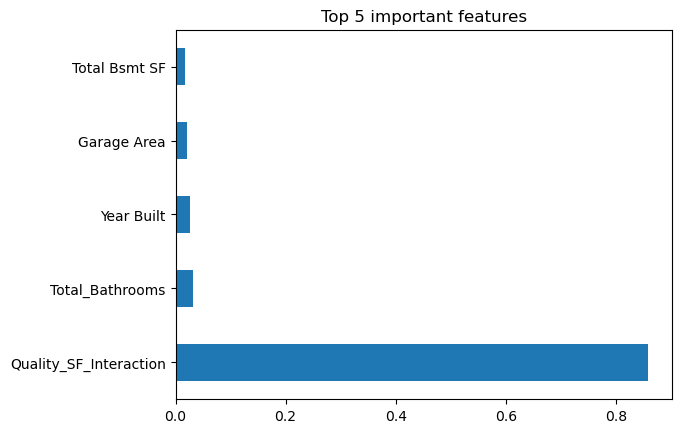

In [112]:
# Feature importance:

importance = pd.Series(best_model.feature_importances_, index=x_train.columns)
importance.nlargest(5).plot(kind='barh')
plt.title('Top 5 important features')
plt.show()

"Quality_SF_Interaction" dominates with 85.8% importance, proving that house quality combined with size is the main driver for the Sales price prediction. The feature engineering strategy was highly successful.

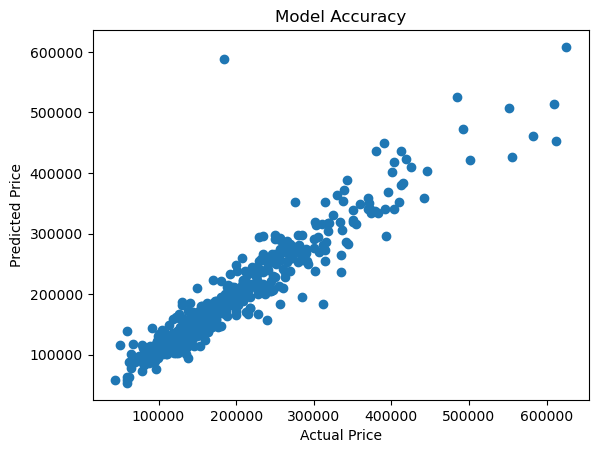

In [113]:
# Actual vs Predicted

plt.scatter(y_test, best_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model Accuracy')
plt.show()

This scatterplot shows a tight clustering around the diagnol line, which confirms the model accurately predicts house prices. R-Square = 0.8800 means we are able to explain 88% of the price variations here.